<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="../images/qworld/qworld.jpg" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> Phase Estimation </h1>

In this section we will talk about an application of Quantum Fourier Transform, which will lead us in the way to Shor's Algorithm.

Suppose that unitary operator $ U $ has an eigenvector (eigenstate) $\ket{\psi}$ with eigenvalue $ e^{2{\pi}i{\phi}} $
where ${\phi}$ is unknown, that is, $U\ket{\psi}$ = $ e^{2{\pi}i{\phi}}$ $\ket{\psi} $. Our goal is to estimate ${\phi}$.

Remarks:
    
- $ v $ is an eigenvector for matrix $ A  $ with eigenvalue $ \lambda $ if $Av = {\lambda}v$. 

- When $ U $ is a unitary operator, then all of its eigenvalues have length 1 and can be expressed in the form $ e^{2{\pi}i{\phi}}$ where $\phi$ is between 0 and 1. 

- One can define power of the operator $ U $, $ U^k $ for some $ k $. In that case, check that  $U^k \ket{\psi} = e^{2\pi i \phi k}\ket{\psi}$

<h3>Task 1 (on paper)</h3>

Show that $\ket{-}$ and $\ket{+}$ are eigenvectors for the $X$ operator with eigenvalues -1 and 1 respectively.

<a href="D03_Phase_Estimation_Solutions.ipynb#task1">click for our solution</a>

<h2> Some observations </h3>

Let $ U $ be a unitary operator with eigenstate $ \ket{\psi} $ and eigenvalue $ e^{2\pi i \phi} $ such that $ U\ket{\psi} =  e^{2{\pi}i{\phi}} \ket{\psi}$. Let's check the effect of controlled-$ U $ ($CU$) operator on a two qubit system where second qubit is set to $ \ket{\psi} $.

In general, for any unitary operator $U$ with $U \ket{\psi} = e^{2\pi i \phi}\ket{\psi}$, and its controlled version $CU$ the following is true.

$$ CU(\ket{0}\ket{\psi}) \rightarrow \ket{0}\ket{\psi} ~~\mbox{   and   }~~ CU(\ket{1}\ket{\psi}) \rightarrow  e^{2{\pi}i{\phi}}\ket{1}\ket{\psi} $$

<img src="images/cu.png" width="40%" align="center">

$ CU $ operator puts a phase of $ e^{2\pi i \phi} $ in front of state $ \ket{1} $ when the first qubit is in superposition of the states $ \ket{0} $ and $ \ket{1} $.

$$ CU~\left (\frac {\ket{0} + \ket{1}} {\sqrt{2}}\ket{\psi} \right ) \rightarrow
\frac {\ket{0} + e^{2{\pi}i{\phi}} \ket{1}} {\sqrt{2}}\ket{\psi}
 $$

Hence, for an arbitrary state, $\alpha \ket{0}\ket{\psi} + \beta \ket{1}\ket{\psi} \xrightarrow{CU} \alpha \ket{0}\ket{\psi} ~+~ e^{2{\pi}i{\phi}}  \beta \ket{1}\ket{\psi} = (\alpha \ket{0} ~+~ e^{2{\pi}i{\phi}} \beta \ket{1})\ket{\psi}$.

<img src="./images/phase_kickback_cu.png" width="35%" align="center">

<h3>Task 2</h3>

Consider the following quantum state where $ x=0 $ or $ 1 $. How can you find out the value of $x$ by applying a single operator?

$$ 
\frac {\ket{0} + (-1)^x \ket{1}} {\sqrt{2}}
$$


<a href="D03_Phase_Estimation_Solutions.ipynb#task2">click for our solution</a>

<h2> Estimating eigenvalues of the $X$ operator </h2>

Recall that $ \ket{+} $ and $ \ket{-} $ are the eigenstates of the operator $X$. If we apply $ CX $ operator to the following quantum state where $ \ket{\psi} $ is either $ \ket{+} $ or $ \ket{-} $, then by Task 2 we know how to find out the value of $x$.

\begin{align*}
CX \left(\frac {\ket{0} + \ket{1}} {\sqrt{2}} \ket{\psi} \right) \rightarrow \frac {\ket{0} + (-1)^x \ket{1}} {\sqrt{2}}\ket{\psi}
\end{align*}



Note that this is a special case of the phase estimation problem where we are trying to estimate eigenvalues of the operator $ X $. In this case, $ \phi $ is either $ 0 $ or $ \frac{1}{2} $ which can be determined by an Hadamard operator. Next we will see how to accomplish this in general.

<h2>Algorithm</h2>

We need two registers where first register contains $ t $ qubits which are in state $ \ket{0} $. $ t $ depends on the number of digits of accuracy and the probability of success while estimating $ \phi $. We will come to details of $ t $ later on. Suppose that the qubits in the first register are numbered from 1 to $ t $. Second register stores $ \ket{\psi} $. Suppose that we are given controlled $ U^{2^j} $ operators as black-box functions. 

- Apply Hadamard to first register. The new quantum state is 

    $\frac {1}{2^{t/2}} \bigl (\ket{0}+\ket{1}\bigr ) \otimes \cdots \otimes  \bigl (\ket{0}+\ket{1}\bigr)\ket{\psi}.$

    
 - Apply $CU^{2^j}$ gate where qubit $t-j$ is the control for $j = 0, \dots ,t-1$.
<br>

    - $j=0$   , Apply $CU^{2^0}$ where qubit $t$ is the control qubit.
	
    $
	\frac {1}{2^{t/2}}\bigl (\ket{0}+\ket{1}\bigr ) \otimes  \cdots \otimes \bigl (\ket{0}+\ket{1}\bigr ) \otimes \bigl(\ket{0}+ {} e^{2{\pi}i\phi 2^0}\ket{1}\bigr )\ket{\psi}
	$
    <br>
    
    - $j=1$   , Apply $CU^{2^1}$ where qubit $t-1$ is the control qubit.
	
    $
	\frac {1}{2^{t/2}}\bigl (\ket{0}+\ket{1} \bigr )\otimes \cdots \otimes \bigl(\ket{0}+ e^{2\pi i \phi 2^1}\ket{1}\bigr ) \otimes \bigl (\ket{0}+ e^{2\pi i\phi 2^0}\ket{1} \bigr )\ket{\psi}$
	
    .
    
    .
    - $j=t - 1$   ,  Apply $CU^{2^{t-1}}$ where qubit $1$ is the control qubit
    
        $\frac {1}{2^{t/2}}\bigl (\ket{0}+e^{2\pi i \phi 2^{t-1}}\ket{1}\bigr ) \otimes\cdots \otimes \bigl(\ket{0}+ {} e^{2{\pi}i\phi 2^1}\ket{1} \bigr) \otimes \bigl(\ket{0}+ e^{2\pi i \phi 2^0}\ket{1}\bigr)\ket{\psi}$ 
    

We have succussfully encoded $\phi$ into the phase of state $\ket{1}$ for each one of the $t$ qubits in the first register. Now let's express the above state in a different formulation.

\begin{align*}
&\frac {1}{2^{t/2}}\bigotimes_{l=1}^{t}\bigl(\ket{0}+e^{2{\pi}i{\phi}2^{t-l}}\ket{1} \bigr)\ket{\psi}\\
=&\frac {1}{2^{t/2}}\bigotimes_{l=1}^{t}\sum_{k_l=0}^{1}e^{2{\pi}i k_l {\phi}2^{t-1}}\ket{k_l}\ket{\psi} \\
&=\frac {1}{2^{t/2}}\sum_{k_1=0}^{1}\cdots\sum_{k_t=0}^{1}e^{2{\pi}i\sum_{1=1}^{t}k_l2^{t-l}
	\phi} \ket{k_1 \dots k_t} \ket{\psi} \\   
&=\frac {1}{2^{t/2}}\sum_{k=0}^{2^{t}-1}e^{2{\pi}i k{\phi}}\ket{k}\ket{\psi}
\end{align*}

- If $\phi$ is of the form $\frac{x}{N}$ for some $ x $ and $ N=2^t $ or equivalently if $ \phi $ can be expressed using exactly $ t $ bits as 

$$ \phi= 0.\phi_1 \dots \phi_t = \frac{\phi_1 \dots \phi_t}{N}, $$ 

then we can reexpress the state of first register as 

$$
\frac {1}{2^{t/2}}\sum_{k=0}^{2^{t}-1}e^{\frac{2{\pi}i k{x}}{N}}\ket{k}.
$$

Recall the $QFT$ of a basis state $\ket{j}$:
      
$$
 \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}e^{\frac{2\pi i j k }{N}} \ket{k}.
$$

Hence after applying $QFT^{\dagger}$ to the first register, we exactly measure $\ket{x}\ket{\psi}=\ket{\phi_1 \dots \phi_t}{\ket{\psi}}$. This can be easily seen as the expression we have obtained is the state obtained after applying $QFT$ to the state $ \ket{x} $. 

<br>

- If not, then choosing $ t = n + \left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil $, we can still approximate $\phi$ accurate to $ n $ bits with probability of success at least $1 - \epsilon$.
	

As we know how to implement $QFT^{\dagger}$ efficiently, we have obtained an efficient algorithm for phase estimation as well. Many interesting problems reduce to phase estimation problem. 


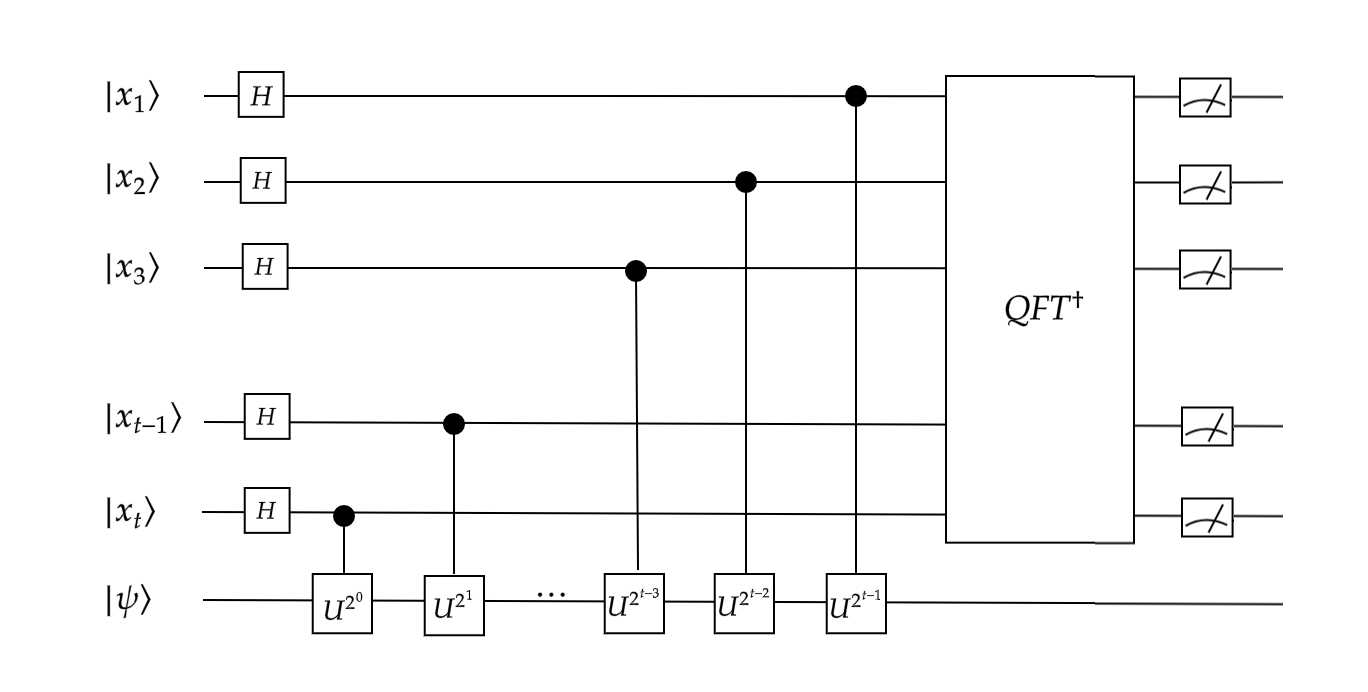Here is the circuit for overall representation for phase estimation algorithm.

<img src="images/phase.png" width="60%" align="center">

<h3>Remarks</h3>

- Need $O(t^2)$ operations and $t$ calls to $CU^{2^j}$ blackbox.

- If you take any arbitrary state instead of $\ket{\psi}$, then you obtain an approximation to one of the eigenvalues with some probability. The reason behind is that you can express any quantum state as the linear combination of the eigenvectors.



<h3>Task 3</h3>

Consider the unitary operator $U$ with eigenvector $\ket{1}$ and eigenvalue $e^{2\pi i \phi}$ where $\phi = \frac{5}{16}$. $CU$ operator can be realized as follows:

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

phase = 5/16
qc_def = QuantumCircuit(2)
qc_def.cp(2*pi*phase,0,1) #We need a 2*pi since CP adds a phase of e^{i \phi}
cu = qc_def.to_instruction()

Pick $t=4$ and implement the phase estimation circuit to estimate $\phi$. Write a function named <i>qpe</i> which takes as parameters <i>t</i>, <i>control</i> qubits, <i>target</i> qubits, <i>circuit</i> and the operator <i>CU</i>.

Note that you will get an exact result since $t=4$ is precise enough.

<i>Remarks:</i>

- You can apply arithmetical operations to gates, such as taking powers or inverses. 
- To apply $QFT^{\dagger}$, you can use the function you have written in the previous notebook.


In [ ]:
%load iqft.py

In [ ]:
#%%writefile qpe.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

def qpe(t,control, target, circuit, CU):
    
    #Apply Hadamard to control qubits
    
    #Apply CU gates
       
    #Apply inverse QFT
   

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

#Set n and t

#Create t qubits of the control register

#Create n qubits of the target register

#Create classical register to measure control qubits

#Create circuit

#Apply QPE

# Measure control qubits
qc1.measure(control, measurement)

# Reverse target (and every other) qubits
qc1=qc1.reverse_bits()
job = AerSimulator().run(qc1,shots=1000)
counts = job.result().get_counts(qc1)
print(counts)                        

<a href="D03_Phase_Estimation_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4</h3>

Try Task 3 this time by setting $t=3$. What do you expect to see?

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

#Set n and t

#Create t qubits of the control register

#Create n qubits of the target register

#Create classical register to measure control qubits

#Create circuit

#Apply QPE

# Measure control qubits
qc1.measure(control, measurement)

# Reverse target (and every other) qubits
qc1=qc1.reverse_bits()
job = AerSimulator().run(qc1,shots=1000)
counts = job.result().get_counts(qc1)
print(counts)                        

<a href="D03_Phase_Estimation_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5</h3>

Try Task 3 this time by setting $\phi=0.685$. Calculate and print the estimates for different $t$ values between 1 and 10. 

In [ ]:
#Create CU operator with phase 0.685




In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

n=1 #Number of qubits in the register storing eigenvector

for t in range (1,10):
    
    #Your code here


<a href="D03_Phase_Estimation_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6</h3>

You are given an operator $U$ with eigenvector $\ket{11}$ and eigenvalue $\phi$, which is this time unknown to you. Use phase estimation to estimate $\phi$ by trying different $t$ values. 

Run the following cell to load operator $CU$

In [ ]:
%run operator.py

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

n=2 #Number of qubits in the register storing eigenvector

for t in range (1,10):

    #Your code here
    

<a href="D03_Phase_Estimation_Solutions.ipynb#task6">click for our solution</a>